In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

In [2]:
agg = pd.read_csv('weekly_agg.csv')

In [3]:
agg = agg[agg['Fisc Yr'] <= 2023]

In [4]:
agg.head()

,Cal Wk,Fisc Yr,Mixd Plt Matrl Desc,WK,Yr & Wk,Act Sc Prxy Usd,Actl Cost Of Prod Usd,Actl Ship Cs,Actl Ship Kg,Actl Ship Lbs,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,202001,2020,T 4 FLVS TSTP MODX252,1,2020&1,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202001,2020,PT 1 FLV TSTP DISP TRAY X8,1,2020&1,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202001,2020,PT 1 FLV TSTP HUTCHX100 SEAS PT,1,2020&1,27.98,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202001,2020,PT 2 FLVS BITES HUTCHX60,1,2020&1,-2853.60,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202001,2020,PT 2 FLVS CRISPS SHPRX72,1,2020&1,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
food = pd.read_csv('food changes.csv')
food = food.iloc[:, 1:]
food = food.rename(columns={'Year': 'Fisc Yr', 'Period': 'Month'})
food['Month'] = food['Month'].str.replace('M', '').astype(int)

food = food[food['Fisc Yr'] >= 2020]
food = food[food['Fisc Yr'] <= 2023]

In [6]:
food

,Fisc Yr,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change
240,2020,1,2020 Jan,261.057,0.5,0.5,1.8
241,2020,2,2020 Feb,261.876,0.3,0.9,1.8
242,2020,3,2020 Mar,262.708,0.3,1.1,1.9
243,2020,4,2020 Apr,266.757,1.5,2.2,3.5
244,2020,5,2020 May,268.439,0.6,2.5,4.0
245,2020,6,2020 Jun,269.770,0.5,2.7,4.5
246,2020,7,2020 Jul,268.863,-0.3,0.8,4.1
247,2020,8,2020 Aug,269.079,0.1,0.2,4.1
248,2020,9,2020 Sep,269.163,0.0,-0.2,3.9
249,2020,10,2020 Oct,269.828,0.2,0.4,3.9


In [13]:
week_to_month = {
    1: 1, 2: 1, 3: 1, 4: 1,
    5: 1, 6: 2, 7: 2, 8: 2,
    9: 2, 10: 3, 11: 3, 12: 3,
    13: 3, 14: 4, 15: 4, 16: 4,
    17: 4, 18: 5, 19: 5, 20: 5,
    21: 5, 22: 5, 23: 6, 24: 6,
    25: 6, 26: 6, 27: 7, 28: 7,
    29: 7, 30: 7, 31: 8, 32: 8,
    33: 8, 34: 8, 35: 8, 36: 9,
    37: 9, 38: 9, 39: 9, 40: 10,
    41: 10, 42: 10, 43: 10, 44: 10,
    45: 11, 46: 11, 47: 11, 48: 11,
    49: 12, 50: 12, 51: 12, 52: 12,
    53: 12
}

# Map week numbers to month numbers using the dictionary
agg.loc[:, 'Month'] = agg['WK'].map(week_to_month)

move = agg.pop('Month')

agg.insert(1, 'Month', move)

agg['Month'] = agg['Month'].astype(int)

In [18]:
temp = pd.merge(agg, food, how = 'left', on = ['Fisc Yr', 'Month'])
temp = temp.drop(columns = ['Label', 'Value'])

In [19]:
temp

,Cal Wk,Month,Fisc Yr,Mixd Plt Matrl Desc,WK,Yr & Wk,Act Sc Prxy Usd,Actl Cost Of Prod Usd,Actl Ship Cs,Actl Ship Kg,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd,1-Month % Change,3-Month % Change,12-Month % Change
0,202001,1,2020,T 4 FLVS TSTP MODX252,1,2020&1,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.5,0.5,1.8
1,202001,1,2020,PT 1 FLV TSTP DISP TRAY X8,1,2020&1,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.5,0.5,1.8
2,202001,1,2020,PT 1 FLV TSTP HUTCHX100 SEAS PT,1,2020&1,27.98,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.5,0.5,1.8
3,202001,1,2020,PT 2 FLVS BITES HUTCHX60,1,2020&1,-2853.60,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.5,0.5,1.8
4,202001,1,2020,PT 2 FLVS CRISPS SHPRX72,1,2020&1,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.5,0.5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62358,202352,12,2023,PT VRTY TSTP 48CT 81.2OZX1 CLUB,52,2023&52,-41582.48,0.0,0.0,0.0,...,25831.57,59515.94,131198.57,289571.92,18630.0,30.56,108492.60,0.1,0.2,2.7
62359,202352,12,2023,PT WHL GRN STRW TSTP 1.69OZ 10CTX12 SS,52,2023&52,-485.10,0.0,0.0,0.0,...,4200.00,201.60,444.43,1764.00,35.0,2.99,512.05,0.1,0.2,2.7
62360,202352,12,2023,PT WHLGRN BRNSGCN TSTP 1.69OZ 10CTX12 SS,52,2023&52,-277.20,0.0,0.0,0.0,...,240.00,115.20,253.96,1008.00,11.0,2.99,253.00,0.1,0.2,2.7
62361,202352,12,2023,PT WILD BRRY TSTP 16CT 27OZX8,52,2023&52,-31051.06,0.0,0.0,0.0,...,29018.75,22286.40,49132.37,139290.01,5777.0,4.99,36926.36,0.1,0.2,2.7


In [36]:
temp['Mixd Plt Matrl Desc'].value_counts()

Mixd Plt Matrl Desc
PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12    209
Name: count, dtype: int64

# MODEL

'Act Sc Prxy Usd', 'Actl Cost Of Prod Usd', 'Actl Ship Cs',
                    'Actl Ship Kg', 'Actl Ship Lbs', 'Actl Ship Units',
                    'Actl Ship Usd',

In [39]:
temp = temp[temp['Mixd Plt Matrl Desc'] == 'PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12']

In [38]:
temp

,Cal Wk,Month,Fisc Yr,Mixd Plt Matrl Desc,WK,Yr & Wk,Act Sc Prxy Usd,Actl Cost Of Prod Usd,Actl Ship Cs,Actl Ship Kg,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd,1-Month % Change,3-Month % Change,12-Month % Change
231,202001,1,2020,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,1,2020&1,17306.55,24076.33,3140.08,14469.72,...,213706.98,82063.63,180920.80,478621.40,17977.0,194.63,118314.28,0.5,0.5,1.8
593,202002,1,2020,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,2,2020&2,441190.12,132355.90,23585.29,108682.72,...,212010.44,81412.16,179484.56,475961.31,18228.0,194.63,117266.23,0.5,0.5,1.8
963,202003,1,2020,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,3,2020&3,176019.12,58057.50,10299.20,47459.38,...,239509.44,91971.93,202764.80,535365.61,18071.0,194.63,132712.11,0.5,0.5,1.8
1324,202004,1,2020,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,4,2020&4,393807.86,120465.50,22720.62,104695.92,...,225610.91,86634.83,190998.57,506793.93,17755.0,194.63,124850.08,0.5,0.5,1.8
1697,202005,1,2020,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,5,2020&5,292787.06,94375.72,18063.42,83236.89,...,226553.38,86996.60,191796.40,507525.72,17785.0,194.63,125007.86,0.5,0.5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61368,202348,11,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,48,2023&48,-244112.77,0.00,0.00,0.00,...,330594.08,126948.60,279875.52,953951.07,22083.0,293.99,194224.05,-0.2,0.3,2.9
61605,202349,12,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,49,2023&49,-254941.28,0.00,0.00,0.00,...,309180.50,118725.68,261747.11,902708.14,22385.0,293.99,181643.60,0.1,0.2,2.7
61837,202350,12,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,50,2023&50,-283248.38,0.00,0.00,0.00,...,376101.21,144423.55,318401.07,1100481.67,22318.0,293.99,220959.50,0.1,0.2,2.7
62058,202351,12,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,51,2023&51,-237473.12,0.00,0.00,0.00,...,319927.65,122852.74,270845.49,935333.88,22203.0,293.99,187957.53,0.1,0.2,2.7


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Sugstd Base Vol Sas', 'Sugstd Shlf Prc Sas', '1-Month % Change', 
                    '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = temp[selected_columns].values
y = temp['Actl Ship Usd'].values

# Split the data into training and testing sets
#train_size = int(len(X) * 0.8)
train_size = 157
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape = (train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=250, batch_size=32, verbose=1)

Epoch 1/250


C:\Users\bpawl\Desktop\CMSE 495\python311\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9062
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8169 
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7336 
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6704 
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8547 
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9414 
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.6636
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7098 
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6081 
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6953 
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6314 
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6789 
Epoch 13/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7570 
Epoch 14/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6271 
Epoch 15/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5604 
Epoch 16/250
5/5 ━━━━━━━━━━━━━━

In [50]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Yr & Wk'] = temp['Yr & Wk'][train_size:]
result_df['WK'] = temp['WK'][train_size:]
result_df['Fisc Yr'] = temp['Fisc Yr'][train_size:]
result_df['Mixd Plt Matrl Desc'] = temp['Mixd Plt Matrl Desc'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-temp['Pln Ship Usd'][train_size:] 

#result_df = result_df.sort_values(by='Date')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [51]:
result_df

,Yr & Wk,WK,Fisc Yr,Mixd Plt Matrl Desc,Predicted,Actual,Predicted_Difference,Planned_Difference
51245,2023&1,1,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,9.436732e+05,829928.09,-1.137451e+05,30812.06
51464,2023&2,2,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,6.703928e+05,728800.99,5.840824e+04,33552.57
51678,2023&3,3,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,5.729199e+05,786825.07,2.139051e+05,232832.42
51892,2023&4,4,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,5.950681e+05,608012.94,1.294481e+04,-28193.42
52104,2023&5,5,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,5.790495e+05,592020.57,1.297107e+04,-59299.97
52311,2023&6,6,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,4.939211e+05,955965.10,4.620440e+05,332618.50
52528,2023&7,7,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,5.057590e+05,1304517.69,7.987587e+05,643487.69
52739,2023&8,8,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,4.002406e+05,954923.84,5.546833e+05,-117452.37
52948,2023&9,9,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,3.588961e+05,983633.96,6.247378e+05,-96319.39
53153,2023&10,10,2023,PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12,8.230752e+05,1239713.41,4.166382e+05,279883.23


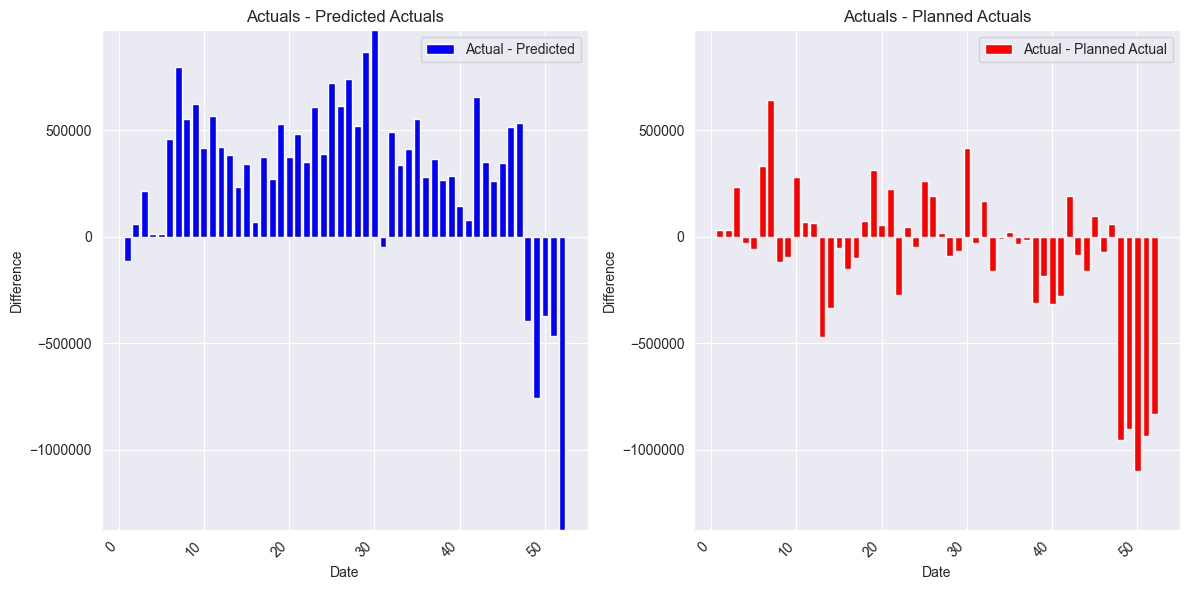

In [59]:
selected_rows = temp[temp['Fisc Yr'] == 2023]
selected_rows = selected_rows[selected_rows['Mixd Plt Matrl Desc'] == 'PT FRSTD BRN SGR CIN TSTP 8CT 13.5OZX12']

import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.bar(result_df['WK'], result_df['Predicted_Difference'], label='Actual - Predicted', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.bar(selected_rows['WK'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'], label='Actual - Planned Actual', color='red')
plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
